In [234]:
import openmc

In [235]:
#materials 
uo2=openmc.Material(material_id=1,name='uranium dioxide')
uo2.add_element("U",1,enrichment=83)
uo2.add_element("O",2)
uo2.set_density("g/cm3",10.55)

water=openmc.Material(material_id=2,name="water")
water.add_element("B",2)
water.add_element("O",1)
water.set_density("g/cm3",4)

materials=openmc.Materials([uo2,water])
materials.export_to_xml()

/home/shochcho/.local/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/shochcho/.local/lib/python3.10/site-packages/openmc/material.py:740: UserWarning: A uranium enrichment of 83 was given for Material ID="1". OpenMC assumes the U234/U235 mass ratio is constant at 0.008, which is only valid at low enrichments. Consider setting the isotopic composition manually for enrichments over 5%.
  warnings.warn(msg)
/home/shochcho/.local/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)


In [236]:
#geometry
fuel_cylinder=openmc.ZCylinder(surface_id=1,x0=0,y0=0,r=0.4096)

pitch = 1
box = openmc.rectangular_prism(pitch, pitch, boundary_type='reflective')


fuel_cell=openmc.Cell(name="FUEL")
box_cell=openmc.Cell(name="water")

fuel_cell.region=-fuel_cylinder
box_cell.region=+fuel_cylinder & box

fuel_cell.fill=uo2
box_cell.fill=water

root=openmc.Universe(universe_id=1,name="pin cell")
root.add_cells([fuel_cell,box_cell])

geometry = openmc.Geometry(root)
geometry.export_to_xml()

/home/shochcho/.local/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/home/shochcho/.local/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another UniverseBase instance already exists with id=1.
  warn(msg, IDWarning)


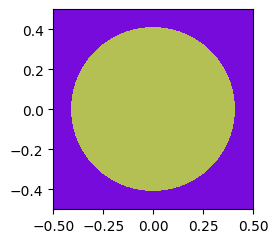

In [237]:
root.plot()

In [238]:
batch=50
inactive=10
particles=1000

settings_file = openmc.Settings()
settings_file.batches = batch
settings_file.inactive = inactive
settings_file.particles = particles

In [239]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################